In [2]:
import tensorflow as tf
import pandas as pd
import os

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

data_csv = tf.keras.utils.get_file(fname=os.path.basename(dataset_url),
                                           origin=dataset_url)

df=pd.read_csv(data_csv,skiprows=1,header=None)

8192/2194 [================================================================================================================] - 0s 0us/step


In [3]:
#podzial na wej i wyj
X=df.iloc[:,0:4].values
Y=df.iloc[:,4:5].values

In [4]:
#dane sa juz znormalizowane
print(X[1])
print(Y[1])

[5.  2.3 3.3 1. ]
[1]


In [5]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np

y = np.ravel(Y)
# Encode classes as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

# One hot encode integer labels
one_hot_Y = np_utils.to_categorical(encoded_Y)

In [6]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
  model = Sequential()
  model.add(Dense(32, input_shape=(4,)))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(3, activation = 'softmax'))

  model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

  return model

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from keras.utils import to_categorical

n_split=3
oos_y = []
oos_pred = []

for train_index,test_index in StratifiedKFold(n_split).split(X,y):
  x_train,x_test=X[train_index],X[test_index]
  y_train,y_test=one_hot_Y[train_index],one_hot_Y[test_index]
  
  model=create_model()
  history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20)

  pred = model.predict(x_test)

  y_test = np.argmax(y_test,axis=1)
  oos_y.append(y_test)
  print(oos_y)

  # raw probabilities to chosen class (highest probability)
  pred = np.argmax(pred,axis=1) 
  oos_pred.append(pred) 
  print(oos_pred)

  # Measure this fold's accuracy
  #y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
  score = metrics.accuracy_score(y_test, pred)
  print(f"Fold score (accuracy): {score}")


  y_test=to_categorical(y_test) 
  print('Model evaluation ',model.evaluate(x_test,y_test))

Epoch 1/20
3/3 [==============================] - 1s 102ms/step - loss: 1.6644 - accuracy: 0.3547 - val_loss: 1.2493 - val_accuracy: 0.3500
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 1.2031 - accuracy: 0.3430 - val_loss: 0.9932 - val_accuracy: 0.6500
Epoch 3/20
3/3 [==============================] - 0s 27ms/step - loss: 0.9775 - accuracy: 0.7039 - val_loss: 0.9174 - val_accuracy: 0.4250
Epoch 4/20
3/3 [==============================] - 0s 23ms/step - loss: 0.9078 - accuracy: 0.4883 - val_loss: 0.8985 - val_accuracy: 0.3750
Epoch 5/20
3/3 [==============================] - 0s 24ms/step - loss: 0.8793 - accuracy: 0.4422 - val_loss: 0.8659 - val_accuracy: 0.6500
Epoch 6/20
3/3 [==============================] - 0s 25ms/step - loss: 0.8587 - accuracy: 0.6875 - val_loss: 0.8159 - val_accuracy: 0.7000
Epoch 7/20
3/3 [==============================] - 0s 24ms/step - loss: 0.8076 - accuracy: 0.7016 - val_loss: 0.7676 - val_accuracy: 0.7000
Epoch 8/20
3/3 [==========

In [38]:
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
#oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )

Final score (accuracy): 0.8166666666666667


In [ ]:
hist = pd.DataFrame(history.history)
print(hist)
hist['epoch'] = history.epoch

        loss  accuracy  val_loss  val_accuracy
0   1.823387    0.0000  1.622671         0.000
1   1.639541    0.0000  1.524101         0.100
2   1.551514    0.2375  1.465351         0.350
3   1.493246    0.3500  1.413116         0.350
4   1.438758    0.3500  1.357222         0.350
5   1.374286    0.3500  1.301039         0.350
6   1.317081    0.3500  1.245505         0.350
7   1.255898    0.3500  1.194836         0.350
8   1.201226    0.3500  1.149601         0.350
9   1.155920    0.3500  1.106575         0.350
10  1.106637    0.3500  1.065807         0.375
11  1.064507    0.3500  1.023254         0.375
12  1.015945    0.4000  0.983756         0.475
13  0.973994    0.4875  0.946947         0.650
14  0.937038    0.6250  0.913540         0.700
15  0.899694    0.7000  0.879633         0.700
16  0.865403    0.7000  0.848422         0.700
17  0.829917    0.7000  0.819319         0.700
18  0.804831    0.7000  0.790182         0.700
19  0.765236    0.7000  0.762716         0.725


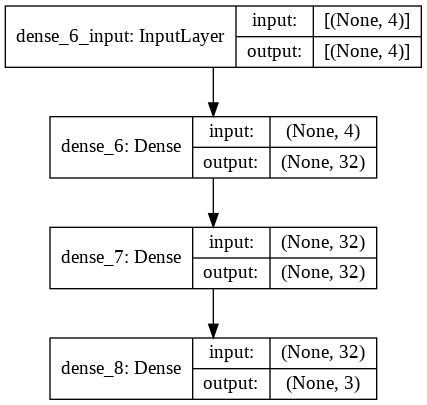

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

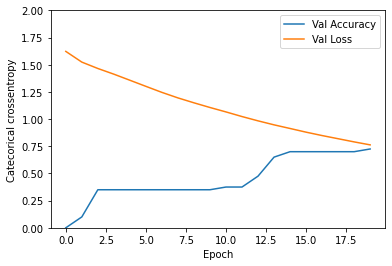

In [ ]:
import matplotlib.pyplot as plt

def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Catecorical crossentropy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.legend()
    plt.ylim([0,2])

plot_history()